In [1]:
!pip install aguaclara
from aguaclara.core.units import unit_registry as u
import aguaclara as ac
import numpy as np
import matplotlib.pyplot as plt


     |████████████████████████████████| 92kB 4.9MB/s 
     |████████████████████████████████| 13.0MB 173kB/s 
     |████████████████████████████████| 163kB 54.5MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.1.12-cp36-none-any.whl size=95166 sha256=9504f26f197b2ed639aecc9dca5dc80ae02cdd2fbe7434e88533ab39b67851da
  Stored in directory: /root/.cache/pip/wheels/b7/8c/87/ea5385804b3a1f6a4ebebb2942cf8c4e4e3b995247f878601e
  Created wheel for pint: filename=Pint-0.8.1-py2.py3-none-any.whl size=134155 sha256=c5c6ea22c67b4dacf7c7718d497bff9deeca729197c8e6892b3a4a86fe5b41d2
  Stored in directory: /root/.cache/pip/wheels/b4/56/36/7c4d6a4e3660e233b95e3b0482551915cb184abca0f93ee1dd
Successfully built aguaclara pint
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1




$$v_t = \frac{D_0^2g}{18\phi\nu}\frac{\rho_{floc_0} -\rho_{H_2O}}{\rho_{H_2O}} \left( \frac{D}{D_0} \right) ^{D_{fractal}-1}$$

The capture velocity for a tube settler is 
$$\frac{v_{z_{Tube}}}{v_{c}}=\frac{L}{D} \cos \alpha \sin \alpha+\sin ^{2} \alpha$$

where $v_{z_{Tube}}$ is the velocity vertical velocity component. We can replace this with the velocity in the direction of the tube axis

$$v_{z} = v_{\alpha} \sin \alpha$$

Substitute for the flow and solve for 

$$L = \frac{4Q_{Tube}}{v_{c}\pi D\cos \alpha} - D\tan\alpha$$


[ 6.25        8.33333333 10.41666667 12.5        14.58333333 16.66666667
 18.75       20.83333333 22.91666667 25.        ] millimeter


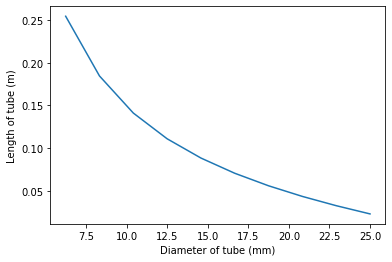

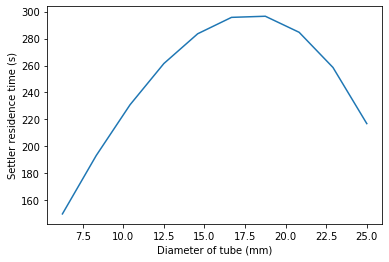

NameError: ignored

In [2]:
def L_tube_settler(v_capture,Q,D,angle):
  return 4*Q/(v_capture*np.pi*D*np.cos(angle)) - D*np.tan(angle)

v_capture = 0.08 * u.mm/u.s 
points=10
D_array = np.linspace(25/4,25,points)*u.mm

settler_angle = (60 * u.deg)
D_fractal = 2.3
D_0 = 4 * u.um
n_tubes = 24 #we can use multiple tubes
q = 75 * u.mL/u.min #pumping rate
q_settler = q/n_tubes

L_array = np.zeros(points)*u.m
t_array = np.zeros(points)*u.s
for i in range(len(D_array)):
  L_array[i] = (L_tube_settler(v_capture,q_settler,D_array[i],settler_angle)).to(u.m)
  t_array[i] = (L_array[i] * ac.area_circle(D_array[i])/q_settler).to(u.s)

print(D_array.magnitude, D_array.units)
plt.plot(D_array, L_array  ,'-');
plt.xlabel('Diameter of tube (mm)');
plt.ylabel('Length of tube (m)');
plt.show()
plt.plot(D_array, t_array  ,'-');
plt.xlabel('Diameter of tube (mm)');
plt.ylabel('Settler residence time (s)');
plt.show()
cell_retention = 30 * u.ml / q

#settler_OD = 1/2 * u.inch
#settler_wall = 1/16 * u.inch
#settler_ID = tube_OD - 2*tube_wall

settler_ID = 1/4 * u.inch

tube_OD = 1/4 * u.inch
tube_wall = 1/16 * u.inch
tube_ID = tube_OD - 2*tube_wall
#tube_ID = 4 * u.mm
tube_L = 3 * u.m

T = 15 * u.degC
nu = ac.viscosity_kinematic(T)
rho_w = ac.density_water(T)
rho_p = 1.6 * u.g/u.mL
phi = 45/24

settling_V = (D_0**2*u.gravity/18/phi/nu*(rho_p-rho_w)/rho_w*((D_max/D_0)**(D_fractal-1))).to(u.um/u.s)
water_V = q_settler / ac.area_circle(settler_ID)

# The following equation is wrong. Use the equation I provided in Latex and as a python function above.
settling_L = settler_ID/(np.cos(settler_angle)/np.sin(settler_angle)) #settling path is equal to D/ctg(angle)

#settler_L = settling_L*water_V/settling_V

sed_retention = settler_L*ac.area_circle(settler_ID)/q_settler
trans_retention = tube_L*ac.area_circle(tube_ID)/q

print('The capture velocity is',settling_V)
print(settler_L.to(u.cm))
print(sed_retention.to(u.min))
print(trans_retention.to(u.min))
print(cell_retention.to(u.min))
print((sed_retention+trans_retention+cell_retention).to(u.min))


#alternative path




Using multiple tubes looks like a good idea.
The shortest residence time comes from using the smallest diameter tube possible
Mulitple tubes will decrease the possibility of floc rollup.
Floc roll up causes small particles to slide up first (not big flocs). However, that analysis was for tube diameters that were large compared with the floc diameter.